# Imports and Data Loading

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
DATA_DIR = "/kaggle/input/bone-marrow-transplant-children/"
DATA_FILE_NAME = "bone-marrow.arff"

In [3]:
with open(DATA_DIR + DATA_FILE_NAME, 'r', encoding='utf-8') as f:
    data ,_ = arff.loadarff(f)

df = pd.DataFrame(data)

df.head()

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,...,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,22.830137,b'yes',b'A',b'present',9.6,b'yes',b'5_10',b'male',35.0,b'A',...,1.338760,19.0,51.0,b'yes',b'yes',32.0,b'no',b'no',999.0,b'0'
1,23.342466,b'yes',b'B',b'absent',4.0,b'yes',b'0_5',b'male',20.6,b'B',...,11.078295,16.0,37.0,b'yes',b'no',1000000.0,b'no',b'yes',163.0,b'1'
2,26.394521,b'yes',b'B',b'absent',6.6,b'yes',b'5_10',b'male',23.4,b'B',...,19.013230,23.0,20.0,b'yes',b'no',1000000.0,b'no',b'yes',435.0,b'1'
3,39.684932,b'no',b'A',b'present',18.1,b'no',b'10_20',b'female',50.0,b'AB',...,29.481647,23.0,29.0,b'yes',b'yes',19.0,b'?',b'no',53.0,b'1'
4,33.358904,b'yes',b'A',b'absent',1.3,b'yes',b'0_5',b'female',9.0,b'AB',...,3.972255,14.0,14.0,b'no',b'no',1000000.0,b'no',b'no',2043.0,b'0'


# Exploratory Data Analysis

Since our object/categorical columns are of type bytes, we need to change that. We decode the utf-8 encoding to remove the byte encoding.

In [4]:
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
df.head()

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,...,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,22.830137,yes,A,present,9.6,yes,5_10,male,35.0,A,...,1.338760,19.0,51.0,yes,yes,32.0,no,no,999.0,0
1,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,B,...,11.078295,16.0,37.0,yes,no,1000000.0,no,yes,163.0,1
2,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,B,...,19.013230,23.0,20.0,yes,no,1000000.0,no,yes,435.0,1
3,39.684932,no,A,present,18.1,no,10_20,female,50.0,AB,...,29.481647,23.0,29.0,yes,yes,19.0,?,no,53.0,1
4,33.358904,yes,A,absent,1.3,yes,0_5,female,9.0,AB,...,3.972255,14.0,14.0,no,no,1000000.0,no,no,2043.0,0


In [5]:
df.columns

Index(['donor_age', 'donor_age_below_35', 'donor_ABO', 'donor_CMV',
       'recipient_age', 'recipient_age_below_10', 'recipient_age_int',
       'recipient_gender', 'recipient_body_mass', 'recipient_ABO',
       'recipient_rh', 'recipient_CMV', 'disease', 'disease_group',
       'gender_match', 'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch',
       'antigen', 'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'relapse',
       'survival_time', 'survival_status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   donor_age_below_35         187 non-null    object 
 2   donor_ABO                  187 non-null    object 
 3   donor_CMV                  187 non-null    object 
 4   recipient_age              187 non-null    float64
 5   recipient_age_below_10     187 non-null    object 
 6   recipient_age_int          187 non-null    object 
 7   recipient_gender           187 non-null    object 
 8   recipient_body_mass        185 non-null    float64
 9   recipient_ABO              187 non-null    object 
 10  recipient_rh               187 non-null    object 
 11  recipient_CMV              187 non-null    object 
 12  disease                    187 non-null    object 
 13  disease_group              187 non-null    object 

In [7]:
df.describe()

,donor_age,recipient_age,recipient_body_mass,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,survival_time
count,187.000000,187.000000,185.000000,187.000000,182.000000,182.000000,187.000000,187.000000,187.000000,187.000000
mean,33.472068,9.931551,35.801081,11.891781,4.745714,5.385096,26752.866310,90937.919786,775408.042781,938.743316
std,8.271826,5.305639,19.650922,9.914386,3.859128,9.598716,161747.200525,288242.407688,418425.252689,849.589495
min,18.646575,0.600000,6.000000,0.790000,0.040000,0.204132,9.000000,9.000000,10.000000,6.000000
25%,27.039726,5.050000,19.000000,5.350000,1.687500,1.786683,13.000000,16.000000,1000000.000000,168.500000
50%,33.550685,9.600000,33.000000,9.720000,4.325000,2.734462,15.000000,21.000000,1000000.000000,676.000000
75%,40.117809,14.050000,50.600000,15.415000,6.785000,5.823565,17.000000,37.000000,1000000.000000,1604.000000
max,55.553425,20.200000,103.400000,57.780000,20.020000,99.560970,1000000.000000,1000000.000000,1000000.000000,3364.000000


We have null values as "?" in the data. We need to replace them with NaN.

In [8]:
df.isin(['?']).any()

donor_age                    False
donor_age_below_35           False
donor_ABO                    False
donor_CMV                     True
recipient_age                False
recipient_age_below_10       False
recipient_age_int            False
recipient_gender             False
recipient_body_mass          False
recipient_ABO                 True
recipient_rh                  True
recipient_CMV                 True
disease                      False
disease_group                False
gender_match                 False
ABO_match                     True
CMV_status                    True
HLA_match                    False
HLA_mismatch                 False
antigen                       True
allel                         True
HLA_group_1                  False
risk_group                   False
stem_cell_source             False
tx_post_relapse              False
CD34_x1e6_per_kg             False
CD3_x1e8_per_kg              False
CD3_to_CD34_ratio            False
ANC_recovery        

In [9]:
df.replace(['?'], np.nan, inplace=True)
df.isin(['?']).any().any()

False

Now that missing values/null values have been changed from "?" to null, we can identify all the null values easily using pandas isnull functionality

In [10]:
df.isnull().sum()

donor_age                     0
donor_age_below_35            0
donor_ABO                     0
donor_CMV                     2
recipient_age                 0
recipient_age_below_10        0
recipient_age_int             0
recipient_gender              0
recipient_body_mass           2
recipient_ABO                 1
recipient_rh                  2
recipient_CMV                14
disease                       0
disease_group                 0
gender_match                  0
ABO_match                     1
CMV_status                   16
HLA_match                     0
HLA_mismatch                  0
antigen                       1
allel                         1
HLA_group_1                   0
risk_group                    0
stem_cell_source              0
tx_post_relapse               0
CD34_x1e6_per_kg              0
CD3_x1e8_per_kg               5
CD3_to_CD34_ratio             5
ANC_recovery                  0
PLT_recovery                  0
acute_GvHD_II_III_IV          0
acute_Gv

In [11]:
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]
print(null_columns)

donor_CMV                  2
recipient_body_mass        2
recipient_ABO              1
recipient_rh               2
recipient_CMV             14
ABO_match                  1
CMV_status                16
antigen                    1
allel                      1
CD3_x1e8_per_kg            5
CD3_to_CD34_ratio          5
extensive_chronic_GvHD    31
dtype: int64


<Axes: >

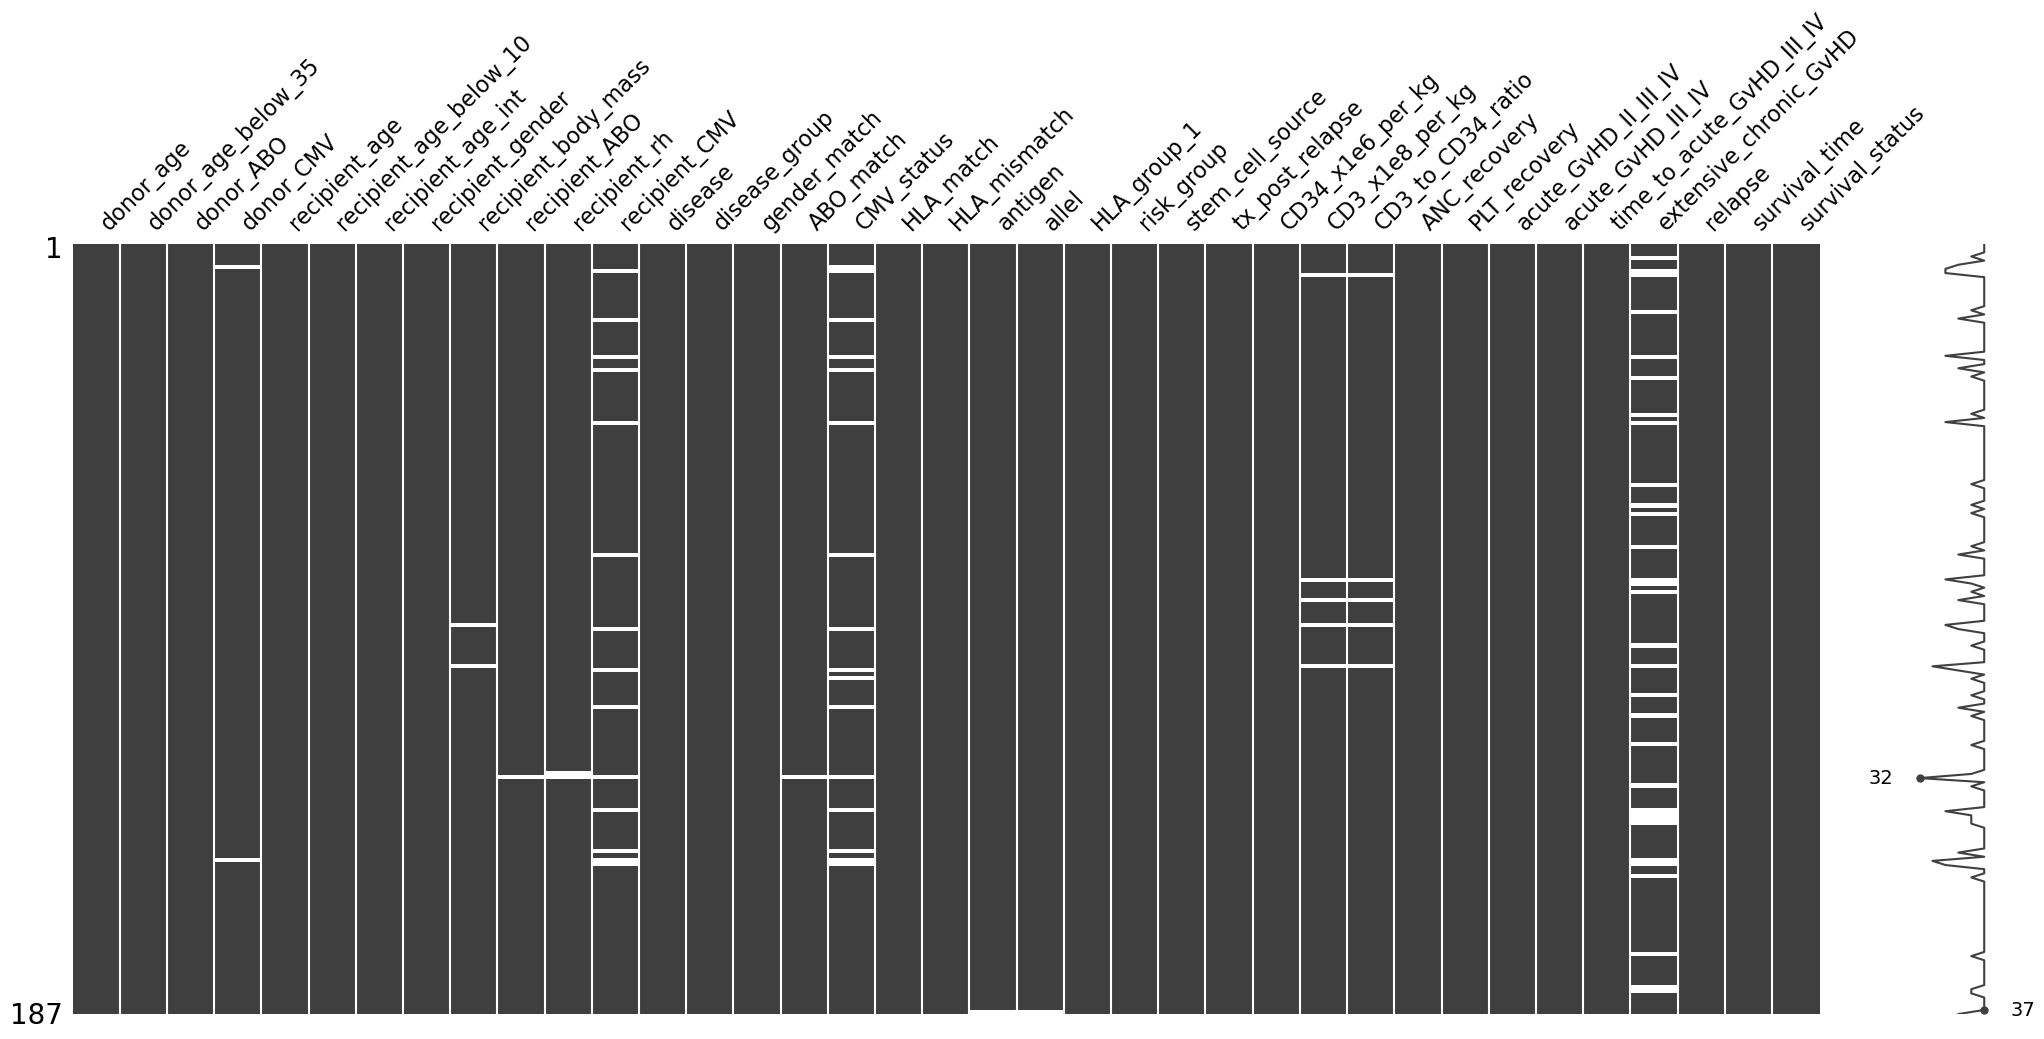

In [12]:
msno.matrix(df)

extensive_chronic GVHD has alot of missing values, since our dataset already quite small, a column with these much missing values is not very pleasing. So, we're going to just remove it for simplicity sake.

In [13]:
df = df.drop(columns=['extensive_chronic_GvHD'])
df.columns

Index(['donor_age', 'donor_age_below_35', 'donor_ABO', 'donor_CMV',
       'recipient_age', 'recipient_age_below_10', 'recipient_age_int',
       'recipient_gender', 'recipient_body_mass', 'recipient_ABO',
       'recipient_rh', 'recipient_CMV', 'disease', 'disease_group',
       'gender_match', 'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch',
       'antigen', 'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'relapse', 'survival_time',
       'survival_status'],
      dtype='object')

In [14]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print('Numerical columns: ', numerical_cols)
print('\nCategorical columns: ', categorical_cols)

Numerical columns:  ['donor_age', 'recipient_age', 'recipient_body_mass', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg', 'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery', 'time_to_acute_GvHD_III_IV', 'survival_time']

Categorical columns:  ['donor_age_below_35', 'donor_ABO', 'donor_CMV', 'recipient_age_below_10', 'recipient_age_int', 'recipient_gender', 'recipient_ABO', 'recipient_rh', 'recipient_CMV', 'disease', 'disease_group', 'gender_match', 'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch', 'antigen', 'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source', 'tx_post_relapse', 'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV', 'relapse', 'survival_status']


In [15]:
for col in categorical_cols:
    print('{} has {} values '.format(col,df[col].unique()))

donor_age_below_35 has ['yes' 'no'] values 
donor_ABO has ['A' 'B' 'AB' '0'] values 
donor_CMV has ['present' 'absent' nan] values 
recipient_age_below_10 has ['yes' 'no'] values 
recipient_age_int has ['5_10' '0_5' '10_20'] values 
recipient_gender has ['male' 'female'] values 
recipient_ABO has ['A' 'B' 'AB' '0' nan] values 
recipient_rh has ['plus' 'minus' nan] values 
recipient_CMV has ['present' 'absent' nan] values 
disease has ['ALL' 'AML' 'chronic' 'nonmalignant' 'lymphoma'] values 
disease_group has ['malignant' 'nonmalignant'] values 
gender_match has ['other' 'female_to_male'] values 
ABO_match has ['matched' 'mismatched' nan] values 
CMV_status has ['3' '0' '2' '1' nan] values 
HLA_match has ['10/10' '9/10' '7/10' '8/10'] values 
HLA_mismatch has ['matched' 'mismatched'] values 
antigen has ['0' '2' '1' '3' nan] values 
allel has ['0' '1' '3' '2' '4' nan] values 
HLA_group_1 has ['matched' 'one_antigen' 'mismatched' 'DRB1_cell' 'one_allel' 'two_diffs'
 'three_diffs'] values

In [16]:
for col in numerical_cols:
    print('{} has {} values '.format(col,df[col].unique()))

donor_age has [22.830137 23.342466 26.394521 39.684932 33.358904 27.391781 34.520548
 21.435616 32.641096 28.783562 29.731507 36.8      40.863014 30.60274
 30.676712 41.164384 40.232877 40.821918 43.375342 31.745205 43.578082
 42.380822 31.545205 24.780822 30.50411  20.605479 40.969863 39.983562
 33.052055 39.172603 24.731507 24.353425 39.024658 23.446575 39.380822
 20.961644 49.860274 43.517808 40.536986 21.4      34.273973 20.471233
 44.380822 20.358904 31.526027 38.761644 28.805479 36.868493 29.772603
 28.821918 30.287671 33.120548 39.641096 39.632877 34.169863 31.194521
 30.389041 24.367123 37.287671 30.2      35.087671 29.161644 44.413699
 55.40274  43.715068 45.915068 22.643836 47.112329 26.221918 24.476712
 35.287671 31.671233 26.731507 39.643836 41.542466 42.268493 41.443836
 29.964384 21.263014 21.756164 29.980822 22.112329 37.       33.550685
 35.630137 40.052055 33.791781 32.372603 25.210959 28.276712 40.386301
 21.972603 30.835616 22.408219 52.476712 21.128767 19.446575 30.

Filling null values in categorical cols with mode and in numerical cols with median of that col

In [17]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [18]:
df.isnull().sum().any()

False

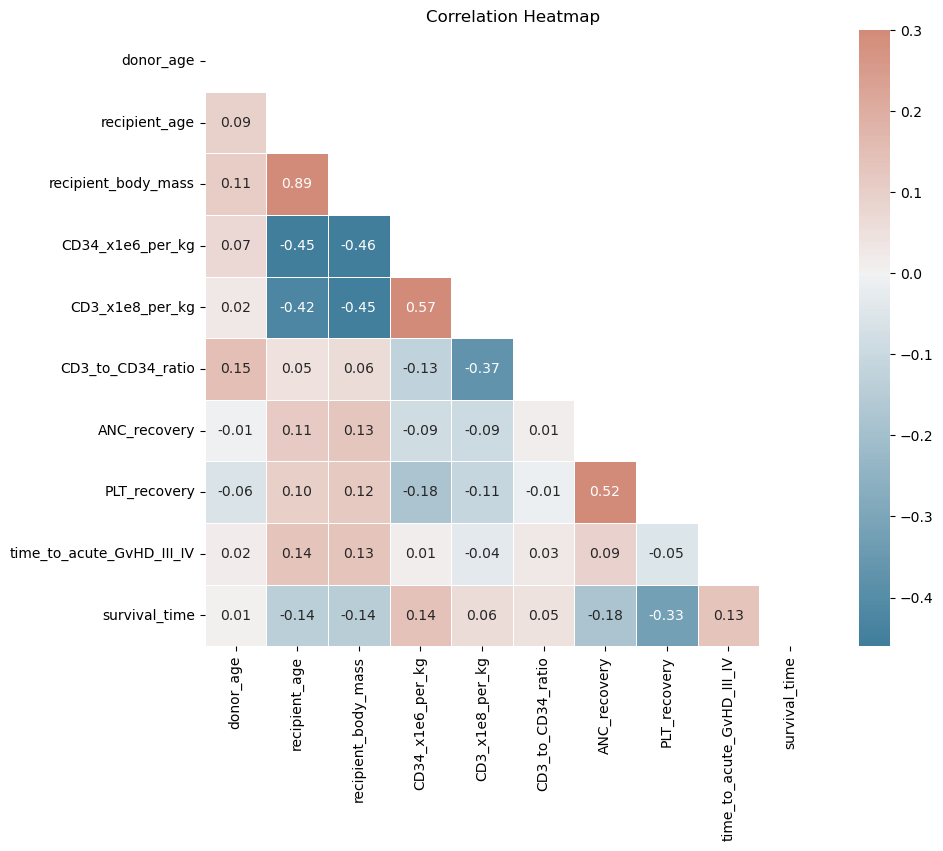

In [19]:
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap=cmap, fmt=".2f", vmax=.3, center=0,
            square=True, linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

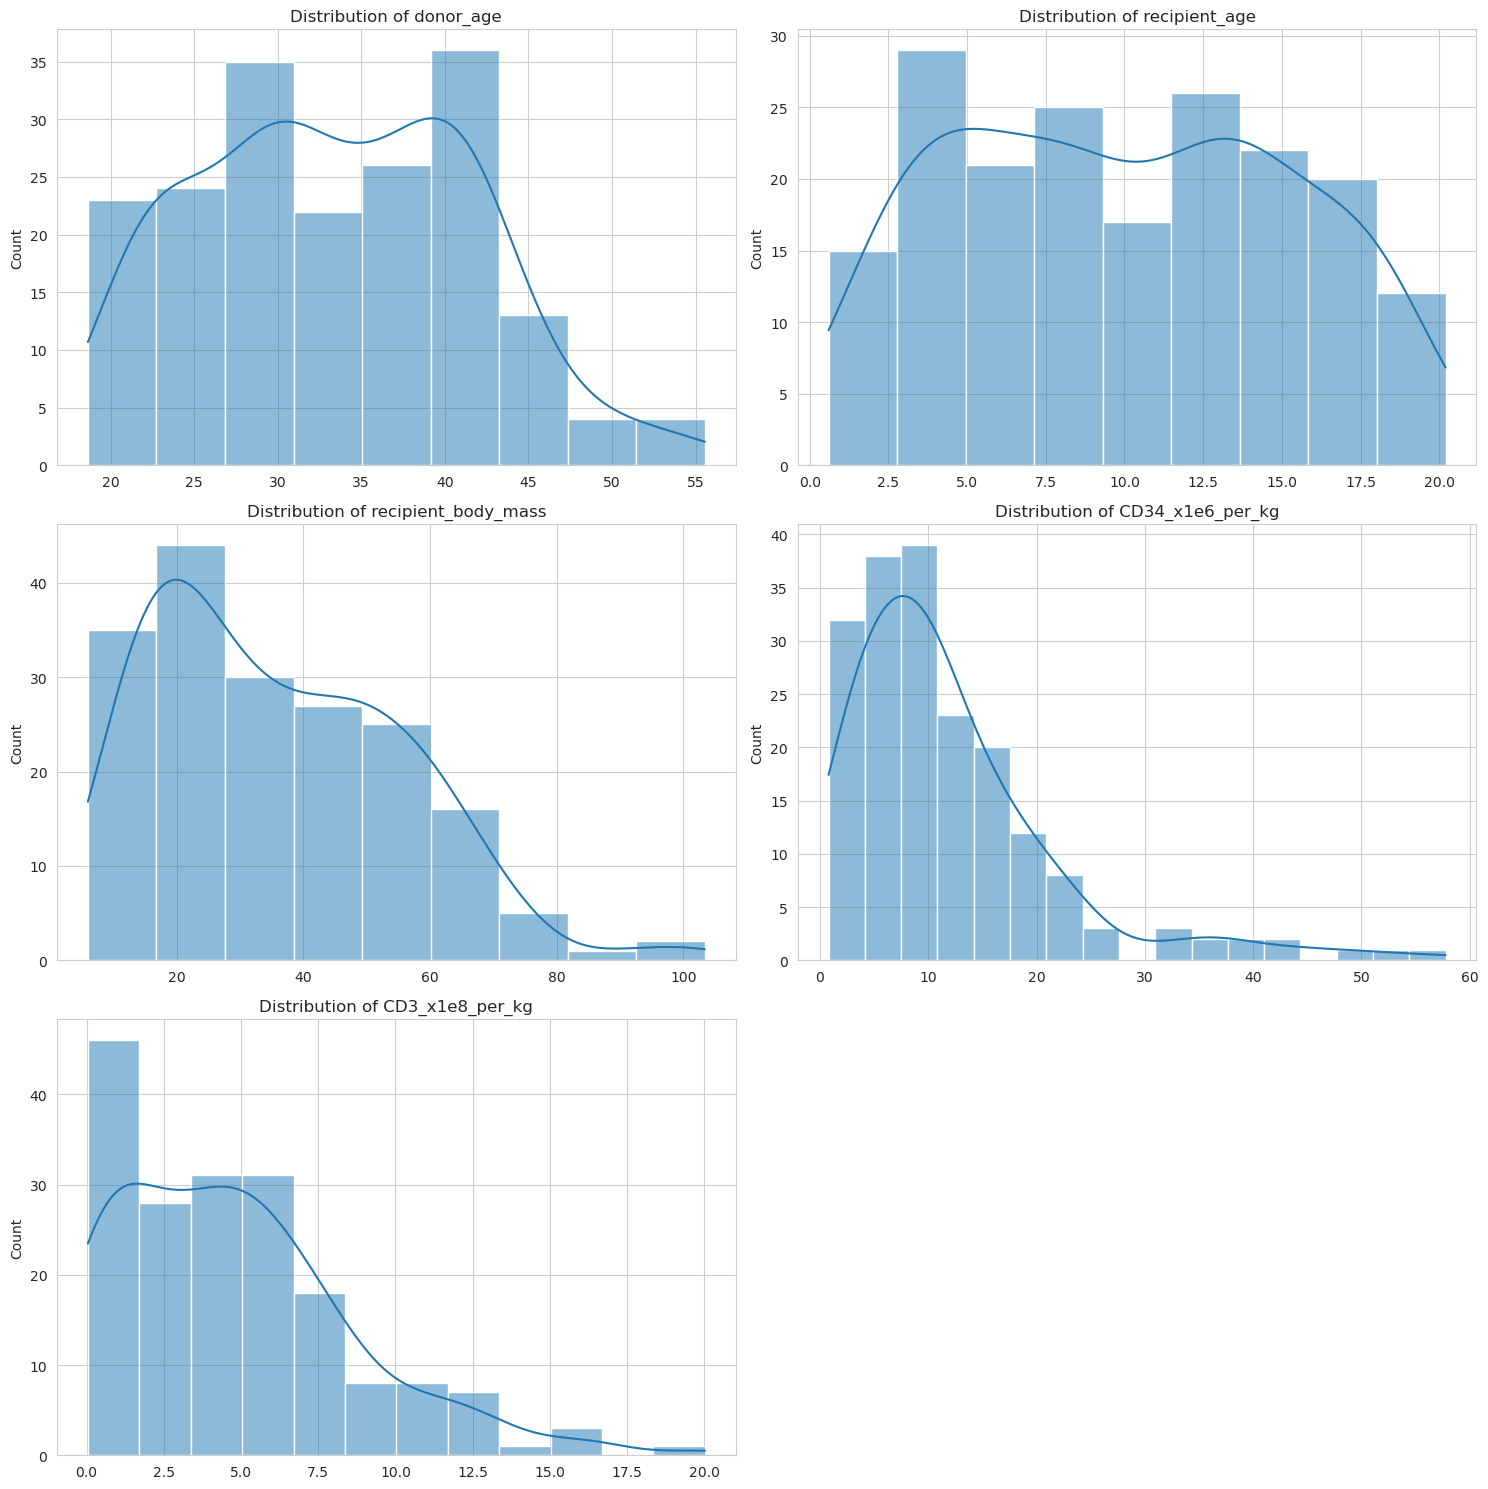

In [20]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()
fig.delaxes(axes[-1])
for ax, col in zip(axes, numerical_cols):
    sns.histplot(data[col], ax=ax, kde=True)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

ANC_recovery and PLT_recovery has one value "1000000.0" which is very large, and messes up our box plots, we remove that value while plotting the boxplot

In [21]:
df['ANC_recovery'].value_counts()

15.0         24
16.0         24
14.0         23
13.0         22
17.0         20
12.0         20
18.0         16
11.0         10
1000000.0     5
19.0          4
22.0          4
21.0          4
20.0          3
23.0          3
10.0          2
26.0          1
24.0          1
9.0           1
Name: ANC_recovery, dtype: int64

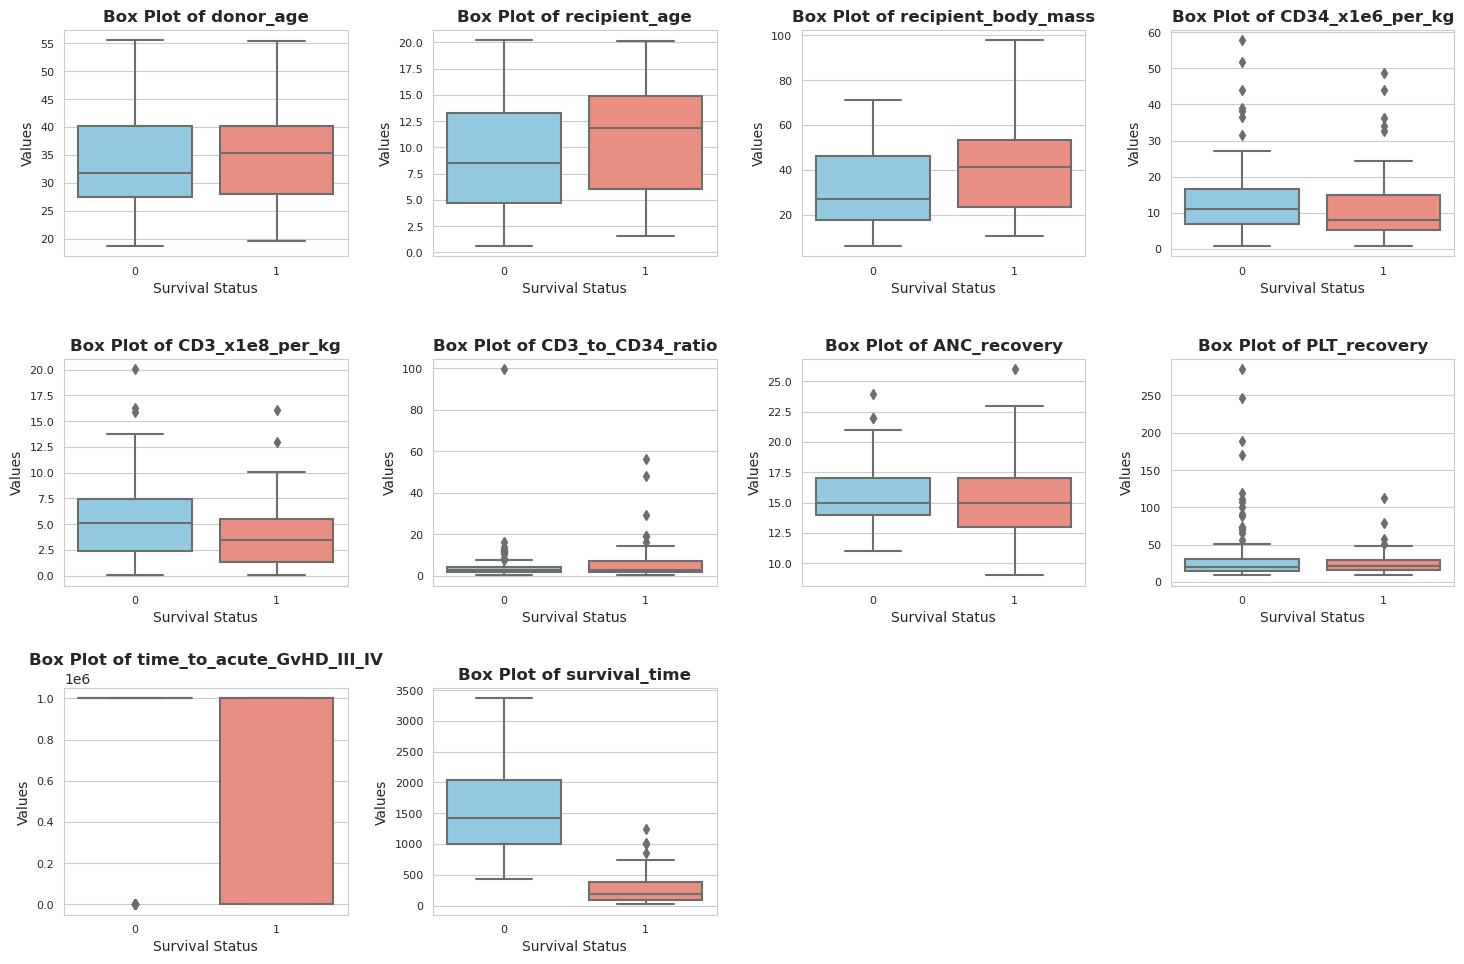

In [22]:
filtered_df = df[(df['ANC_recovery'] != 1000000) & (df['PLT_recovery'] != 1000000)]
sns.set_style('whitegrid')
colors = ['skyblue', 'salmon']
num_rows = 3
num_cols = (len(numerical_cols) + num_rows - 1) // num_rows
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))
axes = axes.flatten()
if len(numerical_cols) < len(axes):
    for i in range(len(numerical_cols), len(axes)):
        fig.delaxes(axes[i])
for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.boxplot(x=filtered_df['survival_status'], y=filtered_df[col], ax=ax, palette=colors)
    ax.set_title(f'Box Plot of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Survival Status', fontsize=10)
    ax.set_ylabel('Values', fontsize=10)
    ax.tick_params(axis='both', labelsize=8)
plt.tight_layout(pad=2)
plt.show()


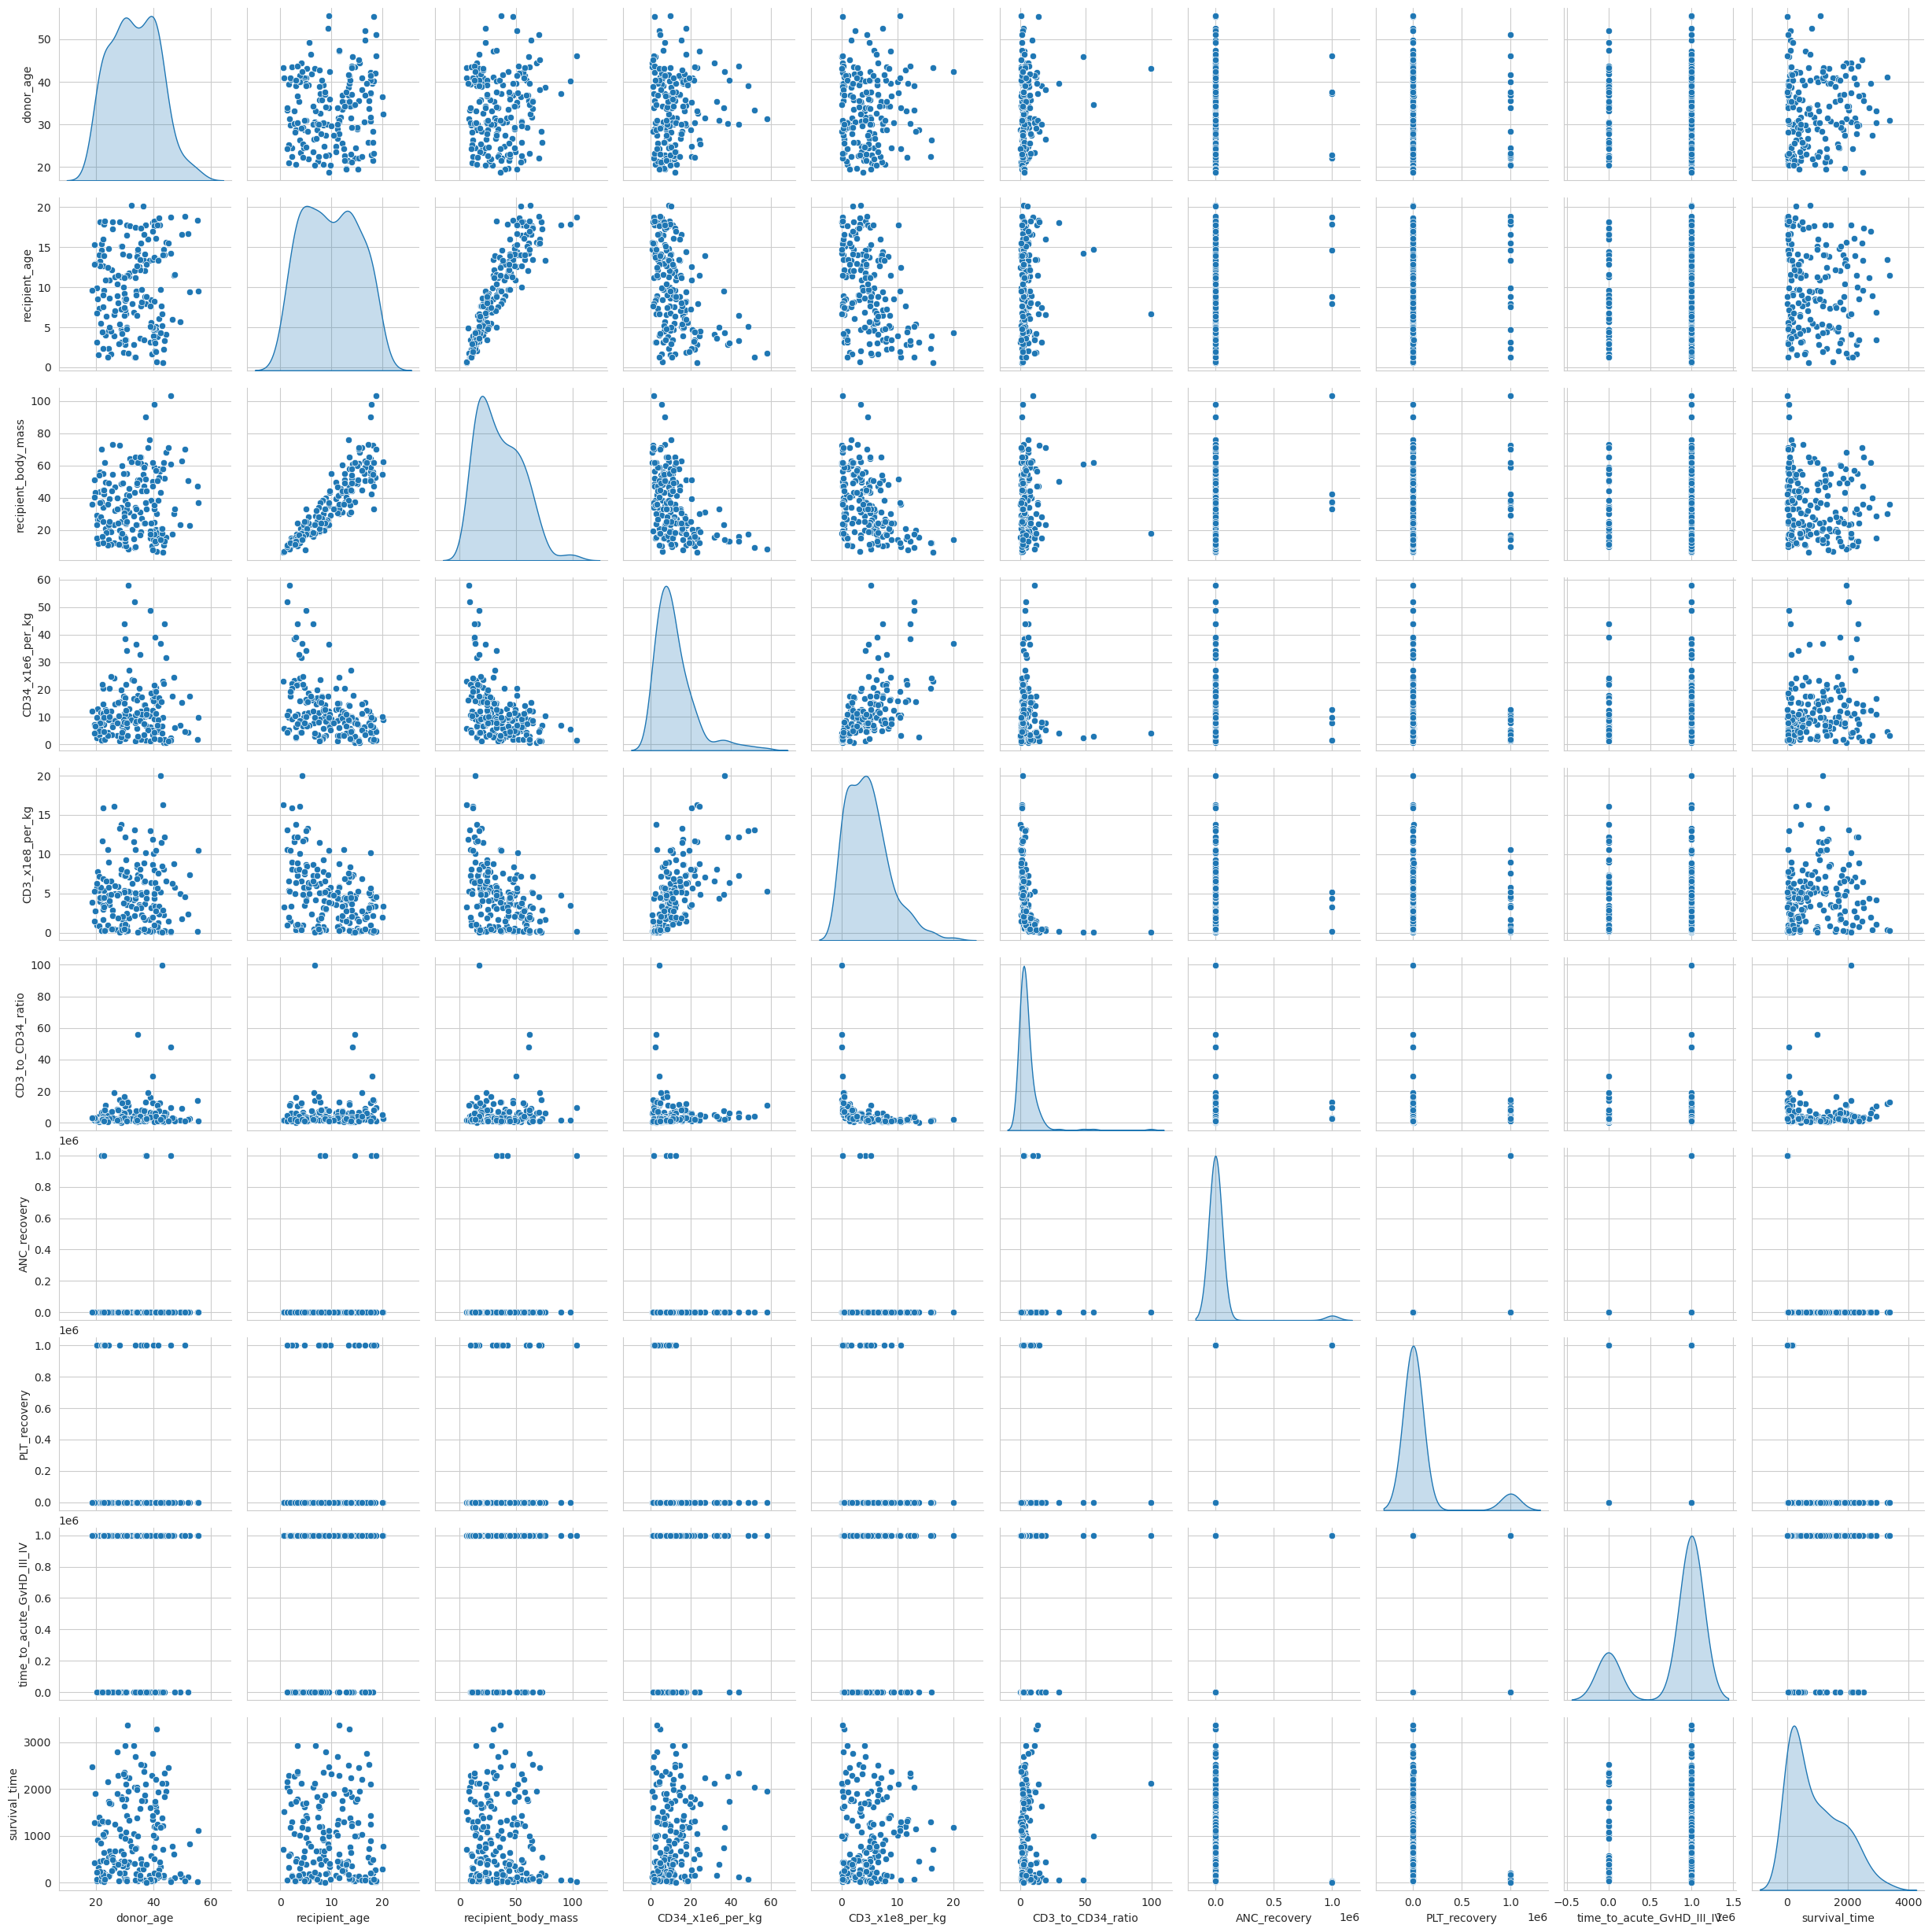

In [23]:
sns.set_style('whitegrid')
numerical_cols = df.select_dtypes(include=np.number).columns
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.show()


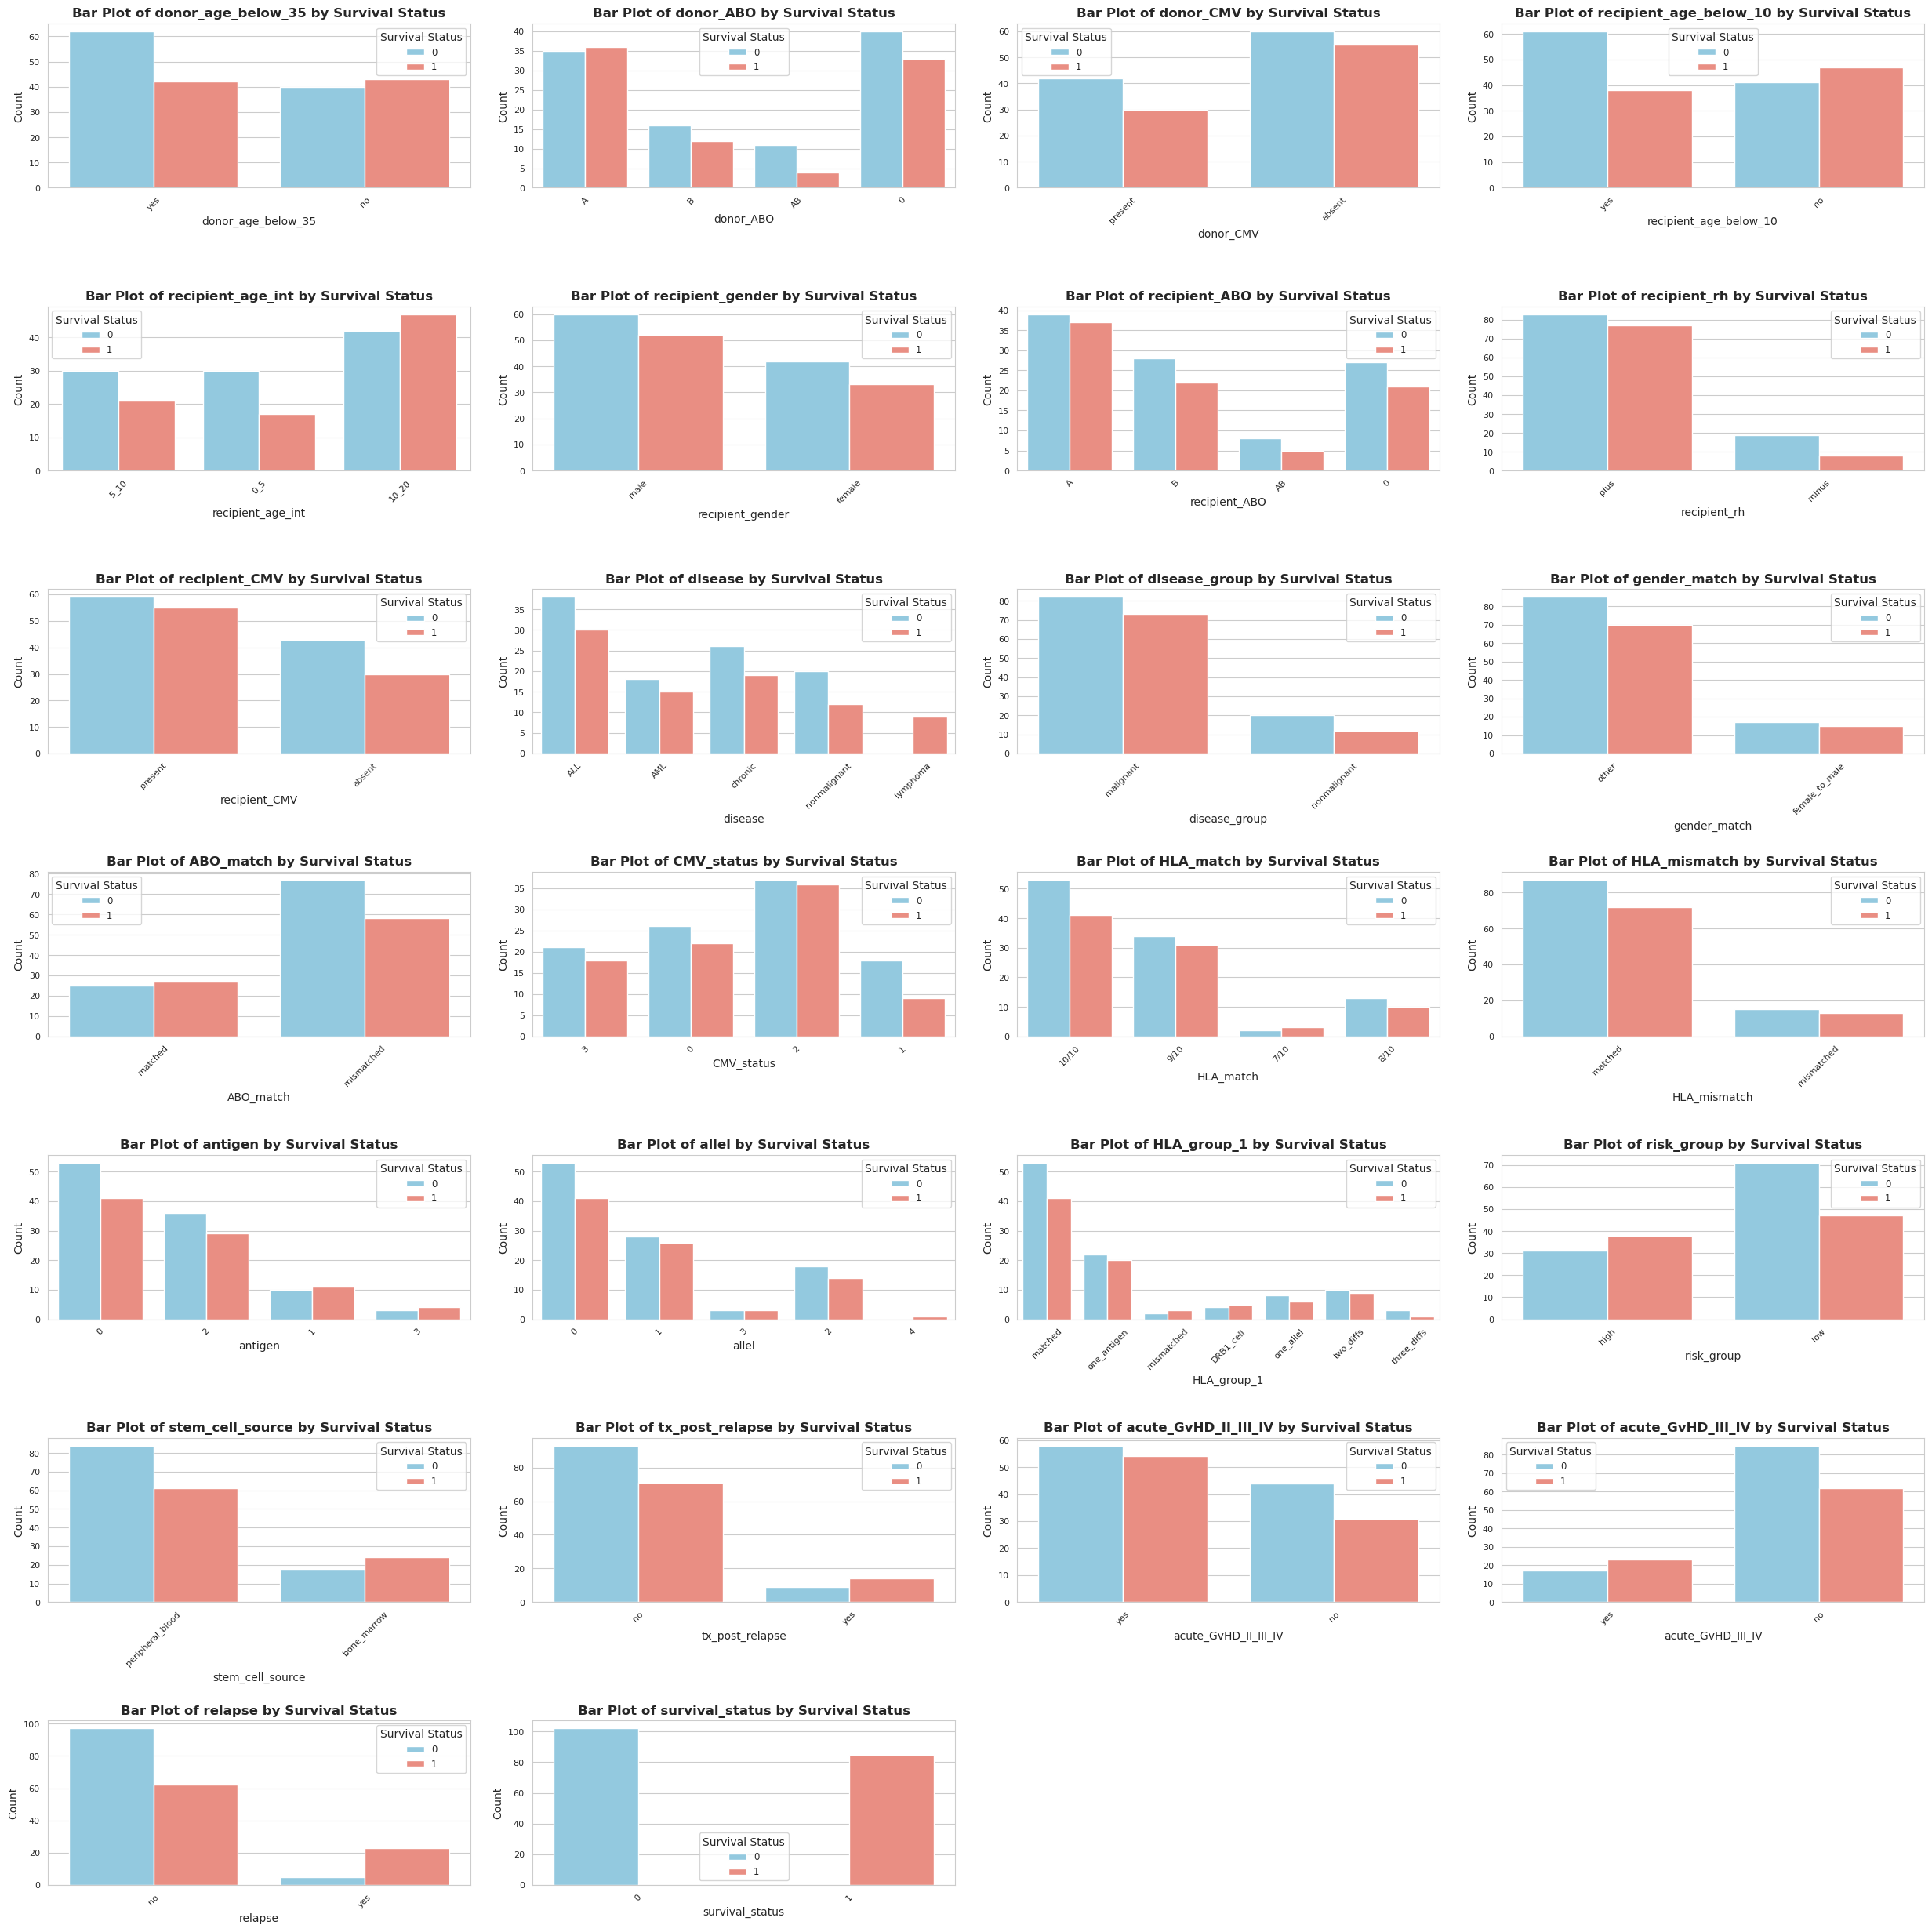

In [24]:
sns.set_style('whitegrid')
colors = ['skyblue', 'salmon']
categorical_cols = df.select_dtypes(include='object').columns
num_cols = 4
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 25))
axes = axes.flatten()

if len(categorical_cols) < len(axes):
    for i in range(len(categorical_cols), len(axes)):
        fig.delaxes(axes[i])

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(x=col, hue='survival_status', data=df, palette=colors, ax=ax)
    ax.set_title(f'Bar Plot of {col} by Survival Status', fontsize=12, fontweight='bold')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='both', labelsize=8)
    ax.legend(title='Survival Status', fontsize='small')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout(pad=2)
plt.show()


In [26]:
temp_df = df.drop('survival_status', axis=1)
categorical_cols = temp_df.select_dtypes(include='object').columns
X = pd.get_dummies(temp_df, columns=categorical_cols)

X.head()

,donor_age,recipient_age,recipient_body_mass,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,survival_time,...,stem_cell_source_bone_marrow,stem_cell_source_peripheral_blood,tx_post_relapse_no,tx_post_relapse_yes,acute_GvHD_II_III_IV_no,acute_GvHD_II_III_IV_yes,acute_GvHD_III_IV_no,acute_GvHD_III_IV_yes,relapse_no,relapse_yes
0,22.830137,9.6,35.0,7.20,5.38,1.338760,19.0,51.0,32.0,999.0,...,0,1,1,0,0,1,0,1,1,0
1,23.342466,4.0,20.6,4.50,0.41,11.078295,16.0,37.0,1000000.0,163.0,...,1,0,1,0,0,1,1,0,0,1
2,26.394521,6.6,23.4,7.94,0.42,19.013230,23.0,20.0,1000000.0,435.0,...,1,0,1,0,0,1,1,0,0,1
3,39.684932,18.1,50.0,4.25,0.14,29.481647,23.0,29.0,19.0,53.0,...,1,0,1,0,0,1,0,1,1,0
4,33.358904,1.3,9.0,51.85,13.05,3.972255,14.0,14.0,1000000.0,2043.0,...,0,1,1,0,1,0,1,0,1,0


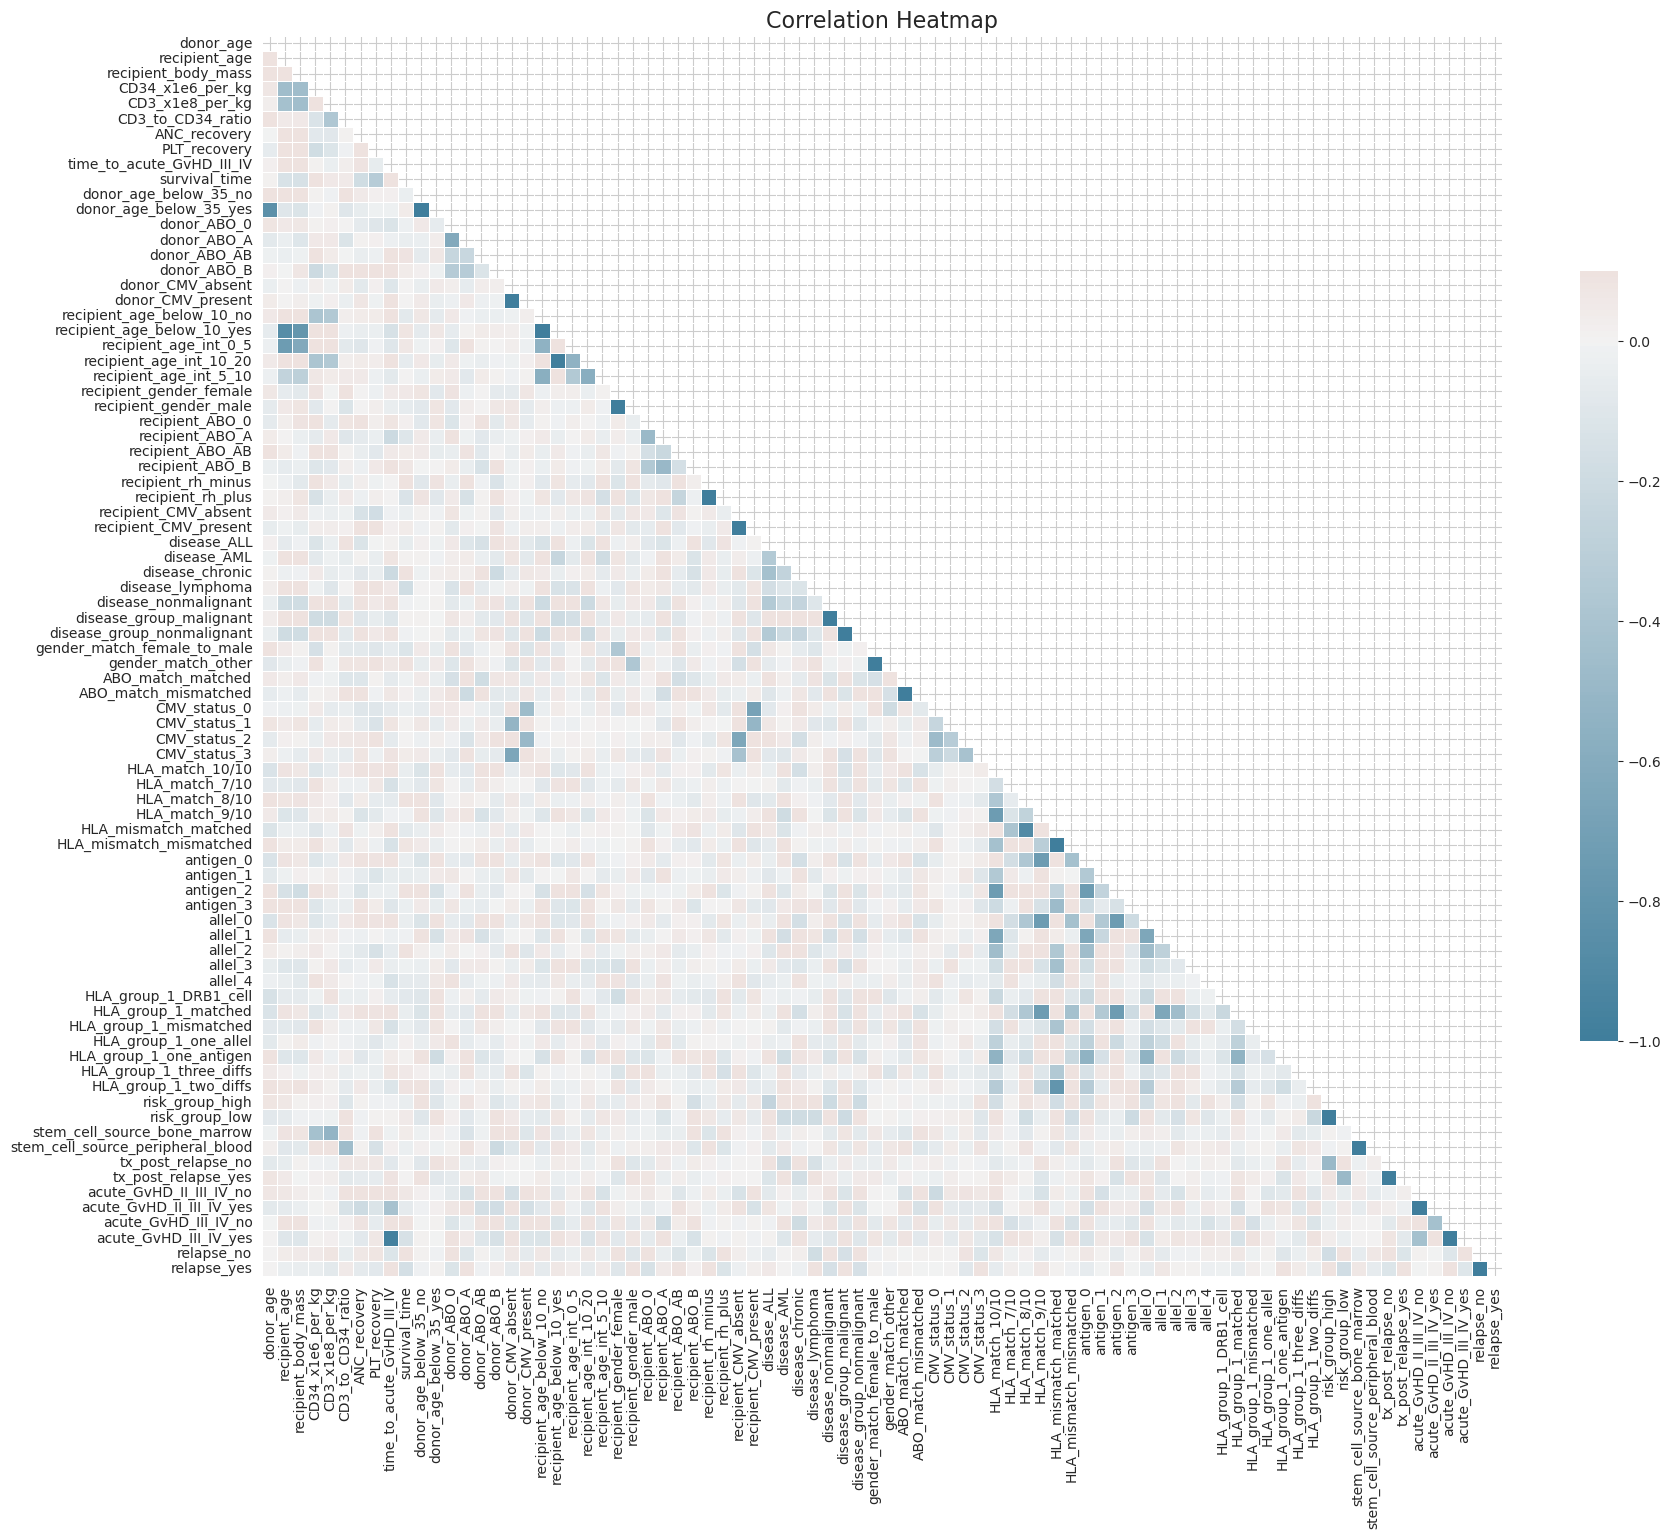

In [27]:
corr_matrix = X.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(20, 20)) 
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, annot=False, mask=mask, cmap=cmap, vmax=.1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Heatmap", fontsize=16)
plt.savefig('correlation_heatmap.png')
plt.show()

In [28]:
y = df['survival_status']
y = y.astype(np.int64)
y.dtype

dtype('int64')

# Modeling

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from scipy.stats import loguniform
import warnings, sys, os

#To suppress scikit-learn warning about parameters combinations not matching when performing HPO
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(X_train.shape)
X_test.shape

(149, 82)


(38, 82)

In [31]:
y_train.value_counts()

0    81
1    68
Name: survival_status, dtype: int64

## Experiment A (Full Feature Set)

### A.1 Full Feature Set Without BorderlineSMOTE Without HPO

In [36]:
# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the model on the feature-selected training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9473684210526315

Precision: 0.9411764705882353

Recall: 0.9411764705882353

F1 Score: 0.9411764705882353


In [37]:
# Instantiate the XGBClassifier
xgb_classifier = XGBClassifier()

# Train the model on the feature-selected training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9736842105263158

Precision: 1.0

Recall: 0.9411764705882353

F1 Score: 0.9696969696969697


In [40]:
# Instantiate the LogisticRegression
logreg = LogisticRegression()

# Train the model on the feature-selected training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9210526315789473

Precision: 0.9375

Recall: 0.8823529411764706

F1 Score: 0.9090909090909091


In [39]:
# Instantiate the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train the model on the feature-selected training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9736842105263158

Precision: 1.0

Recall: 0.9411764705882353

F1 Score: 0.9696969696969697


In [142]:
svm = SVC()

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8947368421052632

Precision: 0.8823529411764706

Recall: 0.8823529411764706

F1 Score: 0.8823529411764706


### A.2 Full Feature Set Without BorderLineSMOTE With HPO

In [140]:
rf_classifier = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees in the forest
    'max_depth': [None, 5, 10],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']    # Number of features to consider at each split
}

search = GridSearchCV(rf_classifier, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train, y_train)

rf_classifier = result.best_estimator_

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 15 folds for each of 162 candidates, totalling 2430 fits

Accuracy: 0.9736842105263158

Precision: 1.0

Recall: 0.9411764705882353

F1 Score: 0.9696969696969697


In [141]:
# Instantiate the XGBClassifier
xgb_classifier = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'min_child_weight': [1, 5, 10],              # Number of trees
    'max_depth': [3, 4, 5],                        # Maximum depth of the tree
    'subsample': [0.8, 0.9, 1.0],                  # Subsample ratio of the training instances
    'gamma': [0, 1, 5],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

search = GridSearchCV(xgb_classifier, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train, y_train)

# Train the model on the feature-selected training data
xgb_classifier = result.best_estimator_

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 15 folds for each of 243 candidates, totalling 3645 fits

Accuracy: 0.9736842105263158

Precision: 1.0

Recall: 0.9411764705882353

F1 Score: 0.9696969696969697


In [143]:
logreg = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': [None, 'l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

search = GridSearchCV(logreg, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train, y_train)

logreg = result.best_estimator_

y_pred = logreg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Fitting 15 folds for each of 72 candidates, totalling 1080 fits

Accuracy: 0.9473684210526315

Precision: 0.9411764705882353

Recall: 0.9411764705882353

F1 Score: 0.9411764705882353


In [145]:
# Instantiate the DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'criterion': ['gini', 'entropy'],       # Split quality criterion
    'max_depth': [None, 5, 10],             # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider at each split
}

search = GridSearchCV(dt, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train, y_train)

dt = result.best_estimator_

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 15 folds for each of 162 candidates, totalling 2430 fits

Accuracy: 0.9473684210526315

Precision: 0.9411764705882353

Recall: 0.9411764705882353

F1 Score: 0.9411764705882353


In [144]:
svm = SVC()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'C': [0.1, 1, 10],                    # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],   # Kernel type
    'gamma': ['scale', 'auto'],            # Kernel coefficient
    'degree': [2, 3, 4]                    # Polynomial degree (only for 'poly' kernel)
}

search = GridSearchCV(svm, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train, y_train)

svm = result.best_estimator_

y_pred = svm.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 15 folds for each of 54 candidates, totalling 810 fits

Accuracy: 0.9473684210526315

Precision: 0.9411764705882353

Recall: 0.9411764705882353

F1 Score: 0.9411764705882353


### A.3 Full Feature Set With BorderlineSMOTE Without HPO

In [146]:
y_test.value_counts()

0    21
1    17
Name: survival_status, dtype: int64

In [147]:
bsmote = BorderlineSMOTE()
bsmote.fit(X_train, y_train)
X_train_S, y_train_S = bsmote.fit_resample(X_train, y_train)

print(y_train_S.value_counts())

1    81

0    81

Name: survival_status, dtype: int64


In [148]:
# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the model on the feature-selected training data
rf_classifier.fit(X_train_S, y_train_S)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9473684210526315

Precision: 0.9411764705882353

Recall: 0.9411764705882353

F1 Score: 0.9411764705882353


In [149]:
# Instantiate the XGBClassifier
xgb_classifier = XGBClassifier()

# Train the model on the feature-selected training data
xgb_classifier.fit(X_train_S, y_train_S)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.9736842105263158

Precision: 1.0

Recall: 0.9411764705882353

F1 Score: 0.9696969696969697


In [150]:
# Instantiate the LogisticRegression
logreg = LogisticRegression()

# Train the model on the feature-selected training data
logreg.fit(X_train_S, y_train_S)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9210526315789473

Precision: 0.9375

Recall: 0.8823529411764706

F1 Score: 0.9090909090909091


In [151]:
# Instantiate the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train the model on the feature-selected training data
dt.fit(X_train_S, y_train_S)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9473684210526315

Precision: 0.9411764705882353

Recall: 0.9411764705882353

F1 Score: 0.9411764705882353


In [152]:
svm = SVC()

svm.fit(X_train_S, y_train_S)

y_pred = svm.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.868421052631579

Precision: 0.8333333333333334

Recall: 0.8823529411764706

F1 Score: 0.8571428571428571


### A.4 Full Feature Set With BorderLineSMOTE With HPO

In [153]:
rf_classifier = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees in the forest
    'max_depth': [None, 5, 10],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']    # Number of features to consider at each split
}

search = GridSearchCV(rf_classifier, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train_S, y_train_S)

rf_classifier = result.best_estimator_

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 15 folds for each of 162 candidates, totalling 2430 fits

Accuracy: 0.9736842105263158

Precision: 1.0

Recall: 0.9411764705882353

F1 Score: 0.9696969696969697


In [154]:
# Instantiate the XGBClassifier
xgb_classifier = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'min_child_weight': [1, 5, 10],              # Number of trees
    'max_depth': [3, 4, 5],                        # Maximum depth of the tree
    'subsample': [0.8, 0.9, 1.0],                  # Subsample ratio of the training instances
    'gamma': [0, 1, 5],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

search = GridSearchCV(xgb_classifier, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train_S, y_train_S)

# Train the model on the feature-selected training data
xgb_classifier = result.best_estimator_

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 15 folds for each of 243 candidates, totalling 3645 fits

Accuracy: 0.9736842105263158

Precision: 1.0

Recall: 0.9411764705882353

F1 Score: 0.9696969696969697


In [155]:
logreg = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': [None, 'l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

search = GridSearchCV(logreg, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train_S, y_train_S)

logreg = result.best_estimator_

y_pred = logreg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Fitting 15 folds for each of 72 candidates, totalling 1080 fits

Accuracy: 0.9210526315789473

Precision: 0.9375

Recall: 0.8823529411764706

F1 Score: 0.9090909090909091


In [156]:
# Instantiate the DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'criterion': ['gini', 'entropy'],       # Split quality criterion
    'max_depth': [None, 5, 10],             # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider at each split
}

search = GridSearchCV(dt, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train_S, y_train_S)

dt = result.best_estimator_

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 15 folds for each of 162 candidates, totalling 2430 fits

Accuracy: 0.9210526315789473

Precision: 0.8888888888888888

Recall: 0.9411764705882353

F1 Score: 0.9142857142857143


In [157]:
svm = SVC()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'C': [0.1, 1, 10],                    # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],   # Kernel type
    'gamma': ['scale', 'auto'],            # Kernel coefficient
    'degree': [2, 3, 4]                    # Polynomial degree (only for 'poly' kernel)
}

search = GridSearchCV(svm, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train_S, y_train_S)

svm = result.best_estimator_

y_pred = svm.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 15 folds for each of 54 candidates, totalling 810 fits

Accuracy: 0.868421052631579

Precision: 0.8333333333333334

Recall: 0.8823529411764706

F1 Score: 0.8571428571428571


## Experiment B (Selected Feature)

### B.1 With Feature Selection Without BorderLineSMOTE Without HPO

In [32]:
from sklearn.feature_selection import mutual_info_classif

features = X_train
mi = mutual_info_classif(features, y_train)
mi_df = pd.DataFrame(mi, index=features.columns, columns=['MI Score'])
mi_sorted = mi_df.sort_values(by='MI Score', ascending=False)
features_selected = mi_sorted.head(10).index
print(features_selected)

Index(['survival_time', 'PLT_recovery', 'relapse_yes',
       'gender_match_female_to_male', 'recipient_ABO_AB', 'disease_lymphoma',
       'CMV_status_0', 'relapse_no', 'recipient_ABO_0',
       'stem_cell_source_bone_marrow'],
      dtype='object')


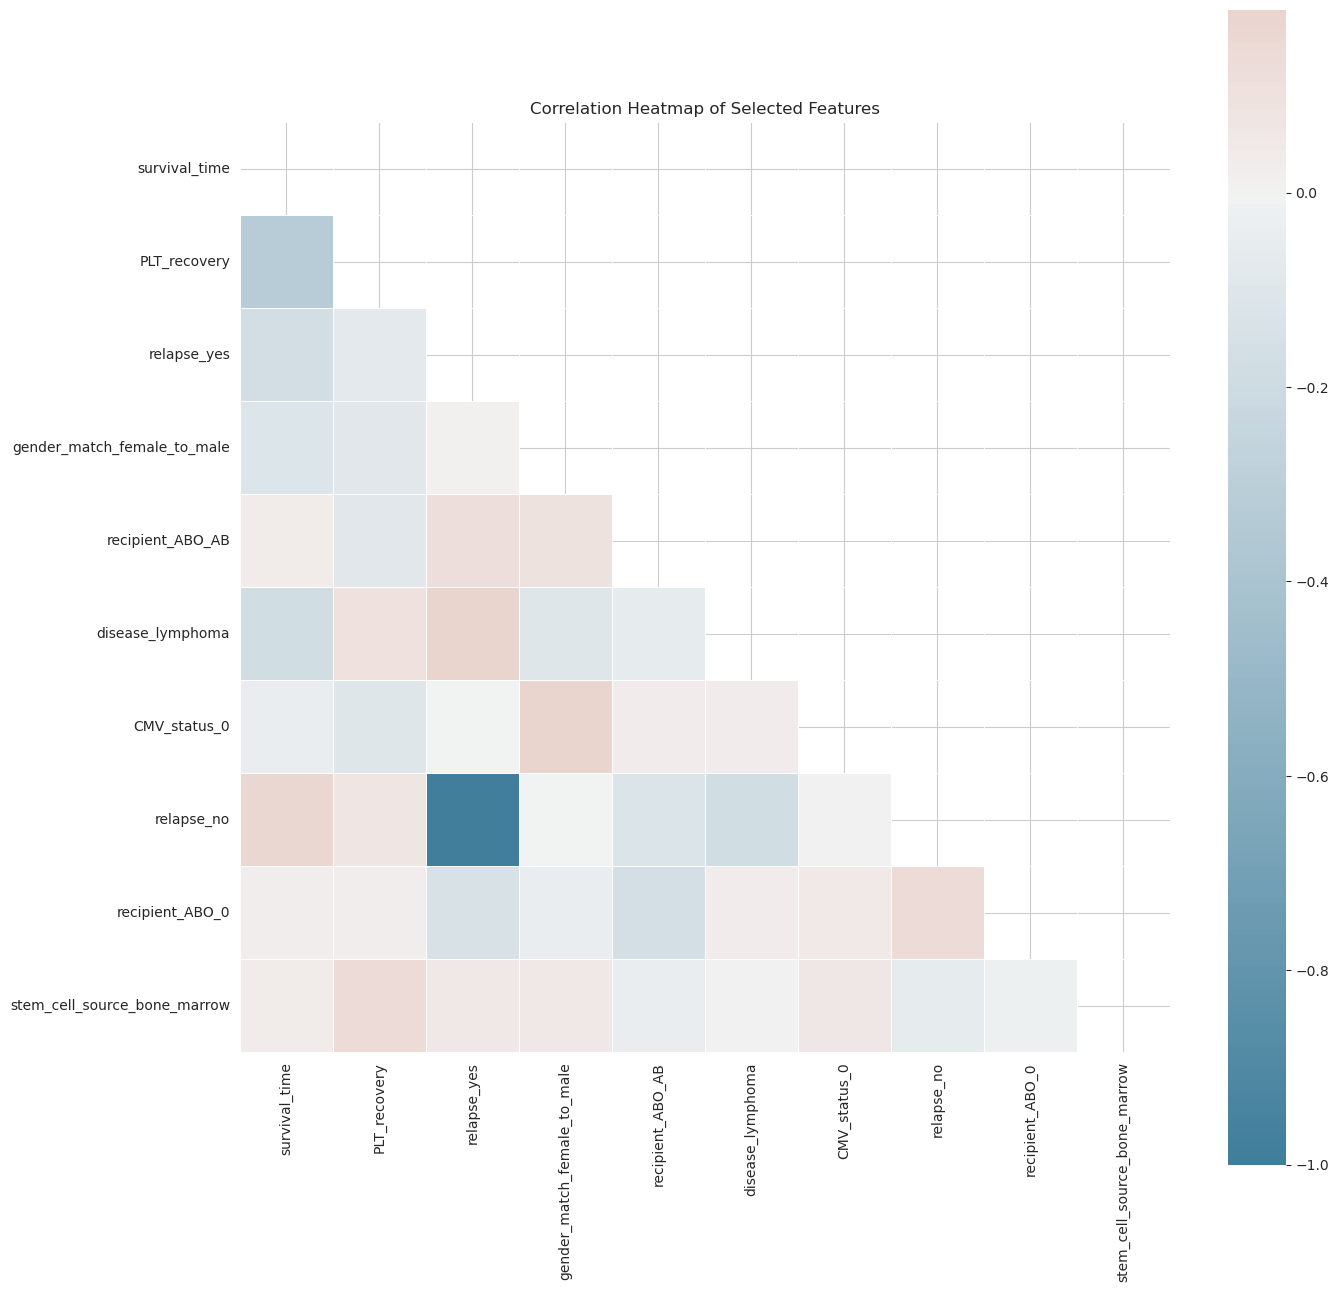

In [33]:
selected_features_corr_matrix = X[features_selected].corr()

mask = np.triu(np.ones_like(selected_features_corr_matrix, dtype=bool))

plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(selected_features_corr_matrix, annot=False, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)
plt.title("Correlation Heatmap of Selected Features")
plt.savefig('corr_heatmap_selected_features.png')
plt.show()


In [159]:
X_train_selected = X_train[features_selected]
X_test_selected = X_test[features_selected]

In [160]:
# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the model on the feature-selected training data
rf_classifier.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9473684210526315

Precision: 0.9411764705882353

Recall: 0.9411764705882353

F1 Score: 0.9411764705882353


In [161]:
# Instantiate the XGBClassifier
xgb_classifier = XGBClassifier()

# Train the model on the feature-selected training data
xgb_classifier.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9210526315789473

Precision: 0.8888888888888888

Recall: 0.9411764705882353

F1 Score: 0.9142857142857143


In [162]:
# Instantiate the LogisticRegression
logreg = LogisticRegression()

# Train the model on the feature-selected training data
logreg.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9210526315789473

Precision: 0.85

Recall: 1.0

F1 Score: 0.9189189189189189


In [163]:
# Instantiate the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train the model on the feature-selected training data
dt.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.868421052631579

Precision: 0.8

Recall: 0.9411764705882353

F1 Score: 0.8648648648648648


In [164]:
svm = SVC()

svm.fit(X_train_selected, y_train)

y_pred = svm.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8947368421052632

Precision: 0.8421052631578947

Recall: 0.9411764705882353

F1 Score: 0.8888888888888888


### B.2 With Feature Selection Without BoderLineSMOTE With HPO

In [165]:
rf_classifier = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees in the forest
    'max_depth': [None, 5, 10],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']    # Number of features to consider at each split
}

search = GridSearchCV(rf_classifier, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train_selected, y_train)

rf_classifier = result.best_estimator_

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 15 folds for each of 162 candidates, totalling 2430 fits

Accuracy: 0.9736842105263158

Precision: 1.0

Recall: 0.9411764705882353

F1 Score: 0.9696969696969697


In [166]:
# Instantiate the XGBClassifier
xgb_classifier = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'min_child_weight': [1, 5, 10],              # Number of trees
    'max_depth': [3, 4, 5],                        # Maximum depth of the tree
    'subsample': [0.8, 0.9, 1.0],                  # Subsample ratio of the training instances
    'gamma': [0, 1, 5],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

search = GridSearchCV(xgb_classifier, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train_selected, y_train)

# Train the model on the feature-selected training data
xgb_classifier = result.best_estimator_

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 15 folds for each of 243 candidates, totalling 3645 fits

Accuracy: 0.9736842105263158

Precision: 1.0

Recall: 0.9411764705882353

F1 Score: 0.9696969696969697


In [167]:
logreg = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': [None, 'l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

search = GridSearchCV(logreg, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train_selected, y_train)

logreg = result.best_estimator_

y_pred = logreg.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Fitting 15 folds for each of 72 candidates, totalling 1080 fits

Accuracy: 0.9210526315789473

Precision: 0.85

Recall: 1.0

F1 Score: 0.9189189189189189


In [168]:
# Instantiate the DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'criterion': ['gini', 'entropy'],       # Split quality criterion
    'max_depth': [None, 5, 10],             # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider at each split
}

search = GridSearchCV(dt, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train_selected, y_train)

dt = result.best_estimator_

# Make predictions on the test data
y_pred = dt.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 15 folds for each of 162 candidates, totalling 2430 fits

Accuracy: 0.8947368421052632

Precision: 0.8421052631578947

Recall: 0.9411764705882353

F1 Score: 0.8888888888888888


In [169]:
svm = SVC()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'C': [0.1, 1, 10],                    # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],   # Kernel type
    'gamma': ['scale', 'auto'],            # Kernel coefficient
    'degree': [2, 3, 4]                    # Polynomial degree (only for 'poly' kernel)
}

search = GridSearchCV(svm, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train_selected, y_train)

svm = result.best_estimator_

y_pred = svm.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 15 folds for each of 54 candidates, totalling 810 fits

Accuracy: 0.9210526315789473

Precision: 0.85

Recall: 1.0

F1 Score: 0.9189189189189189


### B.3 With Feature Selection With BorderLineSMOTE Without HPO

In [170]:
features = X_train_S
mi = mutual_info_classif(features, y_train_S)
mi_df = pd.DataFrame(mi, index=features.columns, columns=['MI Score'])
mi_sorted = mi_df.sort_values(by='MI Score', ascending=False)
features_selected = mi_sorted.head(10).index
print(features_selected)

Index(['survival_time', 'PLT_recovery', 'relapse_yes', 'donor_CMV_present',

       'HLA_mismatch_matched', 'relapse_no', 'donor_age',

       'recipient_gender_female', 'tx_post_relapse_yes',

       'recipient_age_below_10_no'],

      dtype='object')


In [173]:
X_train_S_selected = X_train_S[features_selected]
X_test_selected = X_test[features_selected]

In [174]:
# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the model on the feature-selected training data
rf_classifier.fit(X_train_S_selected, y_train_S)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9473684210526315

Precision: 0.9411764705882353

Recall: 0.9411764705882353

F1 Score: 0.9411764705882353


In [175]:
# Instantiate the XGBClassifier
xgb_classifier = XGBClassifier()

# Train the model on the feature-selected training data
xgb_classifier.fit(X_train_S_selected, y_train_S)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9210526315789473

Precision: 0.8888888888888888

Recall: 0.9411764705882353

F1 Score: 0.9142857142857143


In [176]:
# Instantiate the LogisticRegression
logreg = LogisticRegression()

# Train the model on the feature-selected training data
logreg.fit(X_train_S_selected, y_train_S)

# Make predictions on the test data
y_pred = logreg.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9210526315789473

Precision: 0.85

Recall: 1.0

F1 Score: 0.9189189189189189


In [177]:
# Instantiate the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train the model on the feature-selected training data
dt.fit(X_train_S_selected, y_train_S)

# Make predictions on the test data
y_pred = dt.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9473684210526315

Precision: 0.9411764705882353

Recall: 0.9411764705882353

F1 Score: 0.9411764705882353


In [178]:
svm = SVC()

svm.fit(X_train_S_selected, y_train_S)

y_pred = svm.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9210526315789473

Precision: 0.85

Recall: 1.0

F1 Score: 0.9189189189189189


### B.4 With Feature Selection With BorderLineSMOTE With HPO

In [179]:
rf_classifier = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees in the forest
    'max_depth': [None, 5, 10],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']    # Number of features to consider at each split
}

search = GridSearchCV(rf_classifier, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train_S_selected, y_train_S)

rf_classifier = result.best_estimator_

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 15 folds for each of 162 candidates, totalling 2430 fits

Accuracy: 0.9473684210526315

Precision: 0.9411764705882353

Recall: 0.9411764705882353

F1 Score: 0.9411764705882353


In [180]:
# Instantiate the XGBClassifier
xgb_classifier = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'min_child_weight': [1, 5, 10],              # Number of trees
    'max_depth': [3, 4, 5],                        # Maximum depth of the tree
    'subsample': [0.8, 0.9, 1.0],                  # Subsample ratio of the training instances
    'gamma': [0, 1, 5],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

search = GridSearchCV(xgb_classifier, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train_S_selected, y_train_S)

# Train the model on the feature-selected training data
xgb_classifier = result.best_estimator_

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 15 folds for each of 243 candidates, totalling 3645 fits

Accuracy: 0.9736842105263158

Precision: 1.0

Recall: 0.9411764705882353

F1 Score: 0.9696969696969697


In [181]:
logreg = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': [None, 'l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

search = GridSearchCV(logreg, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train_S_selected, y_train_S)

logreg = result.best_estimator_

y_pred = logreg.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Fitting 15 folds for each of 72 candidates, totalling 1080 fits

Accuracy: 0.9210526315789473

Precision: 0.85

Recall: 1.0

F1 Score: 0.9189189189189189


In [182]:
# Instantiate the DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'criterion': ['gini', 'entropy'],       # Split quality criterion
    'max_depth': [None, 5, 10],             # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider at each split
}

search = GridSearchCV(dt, param_grid, scoring='f1', n_jobs=-1, cv=cv, verbose=1)

result = search.fit(X_train_S_selected, y_train_S)

dt = result.best_estimator_

# Make predictions on the test data
y_pred = dt.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 15 folds for each of 162 candidates, totalling 2430 fits

Accuracy: 0.9473684210526315

Precision: 0.9411764705882353

Recall: 0.9411764705882353

F1 Score: 0.9411764705882353


In [183]:
svm = SVC()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'C': [0.1, 1, 10],                    # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],   # Kernel type
    'gamma': ['scale', 'auto'],            # Kernel coefficient
    'degree': [2, 3, 4]                    # Polynomial degree (only for 'poly' kernel)
}

search = GridSearchCV(svm, param_grid, scoring='f1', n_jobs=-1, cv=cv,verbose=1)

result = search.fit(X_train_S_selected, y_train_S)

svm = result.best_estimator_

y_pred = svm.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 15 folds for each of 54 candidates, totalling 810 fits

Accuracy: 0.9210526315789473

Precision: 0.85

Recall: 1.0

F1 Score: 0.9189189189189189
